In [39]:
import gzip
import json
from collections import defaultdict
from datetime import datetime
import numpy as np
import pandas as pd
import random
# import math

# Load Data

In [2]:
def readJSON(path, sample=float('inf')):
    f = gzip.open(path, 'rt') # default rb?
    f.readline()
    stop = 0
    for l in f:
        if stop >= sample: break
        d = eval(l)
        u = d['gPlusUserId']
        g = d['gPlusPlaceId']
        #c = d['categories']
        #r = d['rating']
        stop += 1
        yield u,g,d#,r,c

In [3]:
def sampleJSON(path):
    f = gzip.open(path, 'rt') # default rb?
    f.readline()
    for l in f:
        if random.randint(0, 11) == 7: # keeps 1/11 of data
            d = eval(l)
            u = d['gPlusUserId']
            g = d['gPlusPlaceId']
            #c = d['categories']
            #r = d['rating']
            yield u,g,d#,r,c

In [4]:
random.seed(500) # for consistent statistics / sampling

In [5]:
# sample data

allReviews = []
allplaces = set()
itemPerUser_all = defaultdict(set)
userPerItem_all = defaultdict(set)
userIDs = {}
placeIDs = {}
all_data = []

for l in sampleJSON("data/reviews.clean.json.gz"):#, 50000):
    u,i = l[0],l[1]
    allReviews.append(l)
    allplaces.add(l[1])
    all_data.append(l[2])
    itemPerUser_all[l[0]].add(l[1])
    userPerItem_all[l[1]].add(l[0])
    if not u in userIDs: userIDs[u] = len(userIDs)
    if not i in placeIDs: placeIDs[i] = len(placeIDs)

nUsers,nPlaces = len(userIDs),len(placeIDs)

Sample data

In [ ]:
# write sample to csv

# sample = open("data/reviews_sample.csv", 'w')
# for d in random.sample(all_data, 250000):#int(.03 * len(all_data))
#     sample.write(d)

# sample.close()

Read in sample only

In [ ]:
# read in sample.csv

# allReviews = []
# allplaces = set()
# itemPerUser_all = defaultdict(set)
# userPerItem_all = defaultdict(set)
# userIDs = {}
# placeIDs = {}
# all_data = []

# for l in readJSON("data/reviews_sample.csv"):#, 50000):
#     u,i = l[0],l[1]
#     allReviews.append(l)
#     allplaces.add(l[1])
#     all_data.append(l[2])
#     itemPerUser_all[l[0]].add(l[1])
#     userPerItem_all[l[1]].add(l[0])
#     if not u in userIDs: userIDs[u] = len(userIDs)
#     if not i in placeIDs: placeIDs[i] = len(placeIDs)

# nUsers,nPlaces = len(userIDs),len(placeIDs)

# EDA

Performed on sample of dataset, was too big for DRAM!

In [ ]:
# ['rating', 'reviewerName', 'reviewText', 'categories', 'gPlusPlaceId', 'unixReviewTime', 'reviewTime', 'gPlusUserId']

In [27]:
# num reviews
print(f"Number of Reviews: {len(allReviews)}")
print(f"Number of Users: {nUsers}")
print(f"Number of Places: {nPlaces}")

Number of Reviews: 955435
Number of Users: 726998
Number of Places: 685907


In [24]:
# Global Average Rating
avg_rating = sum([d['rating'] for d in all_data]) / len(all_data)
print("Average Rating: " + str(avg_rating))

# Average number of reviews per user
avg_revPerUser = sum([len(itemPerUser_all[s]) for s in itemPerUser_all]) / len(itemPerUser_all)
print("Number of Reviews per User: " + str(avg_revPerUser))

avg_revPerPlace = sum([len(userPerItem_all[s]) for s in userPerItem_all]) / len(userPerItem_all)
print("Number of Reviews per Place: " + str(avg_revPerPlace))

Average Rating: 4.047124084840936
Number of Reviews per User: 1.3142195714431126
Number of Reviews per Place: 1.3929512309977883


In [37]:
# Any missing Ratings?
na_rating = 0
na_name = 0
na_text = 0
na_categories = 0
na_unixtime = 0
na_time = 0


for d in all_data:
    if d['rating'] > 5: na_rating += 1
    if d['reviewerName'] == '': na_name += 1
    if d['reviewText'] == '': na_text += 1
    if d['categories'] == []: na_categories += 1
    

In [38]:
print(na_rating)
print(na_name)
print(na_text)
print(na_categories)
print(na_unixtime)
print(na_time)

0
0
845
0
0
0


min: 0.0
max: 5.0


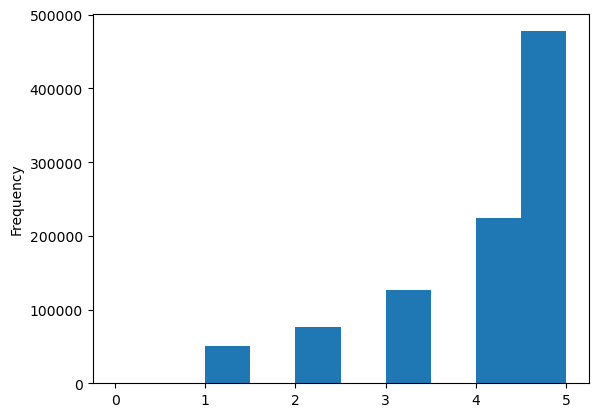

In [46]:
# lets explore what we are predicting
ratings = pd.Series([d['rating'] for d in all_data])
print(f"min: {ratings.min()}\nmax: {ratings.max()}")
ratings.plot(kind='hist');

min: 0
max: 4090


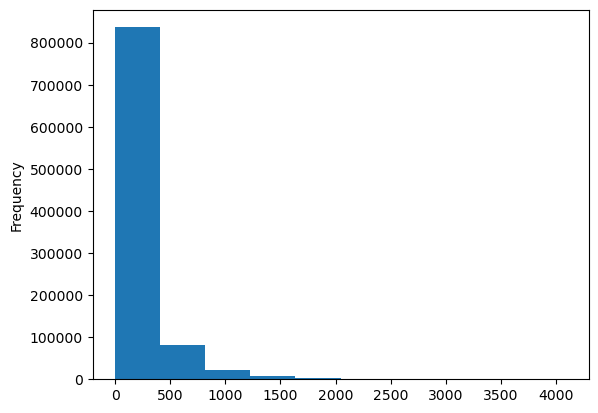

In [61]:
lengths = pd.Series([len(d['reviewText']) if type(d['reviewText']) == str else 0 for d in all_data])
print(f"min: {lengths.min()}\nmax: {lengths.max()}")
lengths.plot(kind='hist');